<a href="https://colab.research.google.com/github/Neverenvy1/KBO_Baseball/blob/main/KBO_14_20_WinPercentage_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Neverenvy1/KBO_Baseball/main/KBO_Team_14_20_total_01.csv' 
df = pd.read_csv(url) 
# 데이터 세트는 Pandas Dataframe에 이제 저장됩니다.
# print(df.head)

In [3]:
data = df.drop(['WP','W','L','TWPA','RANK'], axis = 1)
target = df['WP'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9738226513010663 0.7733511200377183


In [6]:
rf.fit(train_input, train_target)
print(np.round(rf.feature_importances_, decimals=3))

[0.085 0.041 0.002 0.005 0.001 0.002 0.024 0.002 0.002 0.002 0.003 0.002
 0.005 0.003 0.003 0.002 0.001 0.003 0.001 0.002 0.007 0.026 0.03  0.044
 0.017 0.004 0.003 0.004 0.002 0.003 0.001 0.006 0.003 0.003 0.003 0.003
 0.001 0.    0.001 0.003 0.001 0.002 0.198 0.004 0.031 0.408]


In [7]:
print(rf.score(test_input, test_target))

0.6930568415981604


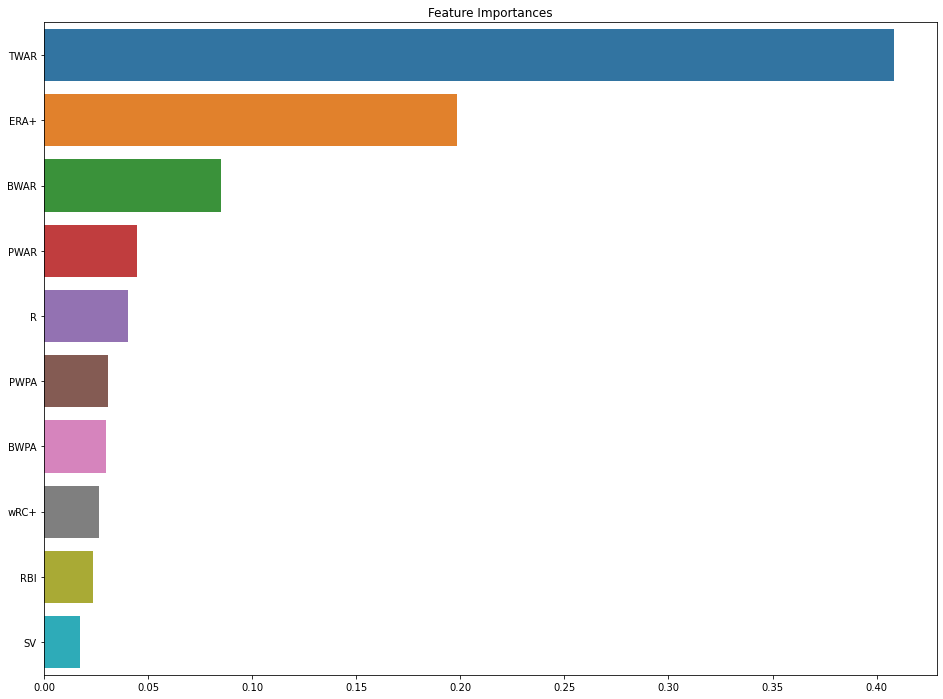

In [8]:
%matplotlib inline

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(16,12))
plt.title('Feature Importances')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()

### **XGBoost**

In [9]:
from xgboost import XGBRegressor

xgb = XGBRegressor(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9998868548368671 0.8061350348218415


In [10]:
xgb.fit(train_input, train_target)

[15:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='hist', verbosity=1)

In [11]:
print(np.round(xgb.feature_importances_,3))

[0.045 0.131 0.003 0.003 0.    0.005 0.003 0.002 0.001 0.004 0.003 0.007
 0.002 0.001 0.    0.011 0.005 0.005 0.001 0.    0.001 0.007 0.019 0.14
 0.051 0.008 0.002 0.003 0.    0.    0.002 0.003 0.002 0.    0.    0.001
 0.001 0.002 0.    0.    0.009 0.002 0.203 0.001 0.078 0.237]


In [12]:
print(xgb.score(test_input, test_target))

0.7268820448124753


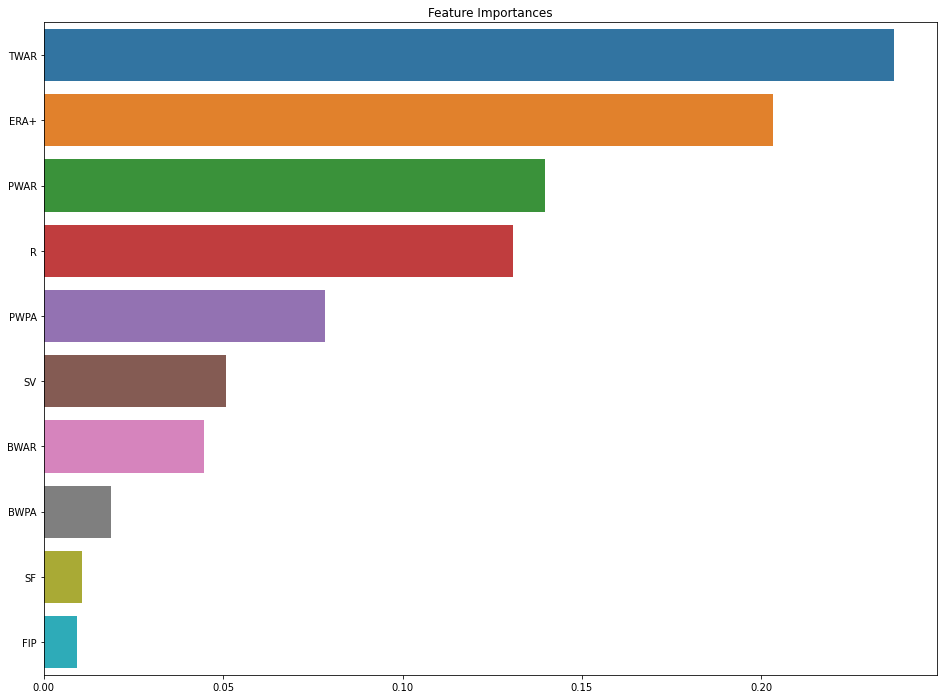

In [13]:
%matplotlib inline

ftr_importances_values = xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(16,12))
plt.title('Feature Importances')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()

### **LightGBM**

In [14]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9124793230080129 0.7344229572267915


In [15]:
lgb.fit(train_input, train_target)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
print(np.round(lgb.feature_importances_,3))

[ 1  3  0  0  0  1  0  0  0  7  5  0  2  5  0  2  2  5  0  0  0  5 10  0
  3  0  7  0  0  4  9  0  0  0  0  0  0  0  0  0  0  2  5  3 16  3]


In [17]:
print(lgb.score(test_input, test_target))

0.6693175113369192


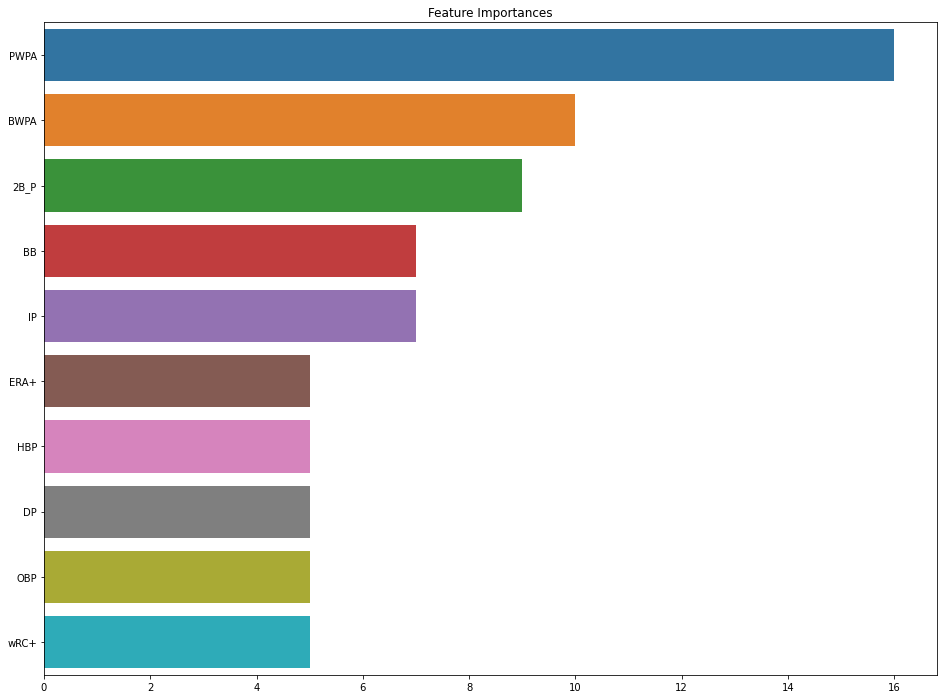

In [18]:
%matplotlib inline

ftr_importances_values = lgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(16,12))
plt.title('Feature Importances')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()